In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
from ase.io import read, write
from ase.visualize import view, ngl
from ase import Atoms
from ase.geometry.analysis import Analysis
from mol_td import *
import ase
import jax.numpy as jnp


In [38]:
cfg = Config()
positions, forces, atoms = cfg.load_raw_data('/home/amawi/projects/mol-td/data/uracil_dft.npz')
n_data, n_atoms = positions.shape[:2]

Model: SimpleTDVAE                 
 n_enc_layers: 2                 
 n_dec_layers: 2 
 Pos-Lims: ((-2.355283737182617, 2.9329960346221924), (-2.7979094982147217, 2.6029012203216553), (-1.1582574844360352, 1.144334077835083))                 
 F-Lims: ((-226.28143310546875, 234.85540771484375), (-237.38124084472656, 239.2488555908203), (-100.43793487548828, 113.4931411743164))                 
 A-Lims: 1 8    


In [64]:

atoms_list = {1: 'H',
         2: 'He',
         3: 'Li',
         4: 'Be',
         5: 'B',
         6: 'C',
         7: 'N',
         8: 'O',
         9: 'F',
         10: 'Ne',
         11: 'Na',
         12: 'Mg', 
         13: 'Al',
         14: 'Si'

}
pos = positions[::100]

unique_atoms = [int(a) for a in jnp.unique(atoms).astype(int)]
# unique_atoms_names = []
print(unique_atoms)
from itertools import product, combinations
bonds = product(*(tuple(unique_atoms), tuple(unique_atoms))) # gives all combinations
print(len(list(bonds)))
bonds = list(combinations(unique_atoms, 2))  # only gives unique combinations
bonds.extend((x, x) for x in unique_atoms)
# print(list(bonds))

rbfs = {}
for A, B in bonds:
    idxsA = np.where(atoms == A)[0]
    idxsB = np.where(atoms == B)[0]
    print(idxsA)
    Ar = pos[:, idxsA, ...][:, :, None, :]
    Br = pos[:, idxsB, ...][:, None, :, :]
    distances = np.linalg.norm(Ar - Br, axis=-1).reshape(-1)
    rbf, x = np.histogram(distances, bins=50, range=(0, np.sqrt(2)))
    x = x[:-1] + (x[1] - x[0]) / 2.
    rbfs[f'{atoms_list[A]}-{atoms_list[B]}'] = np.stack([x, rbf], axis=-1)






[1, 6, 7, 8]
16
[ 8  9 10 11]
[ 8  9 10 11]
[ 8  9 10 11]
[0 1 3 5]
[0 1 3 5]
[2 4]
[ 8  9 10 11]
[0 1 3 5]
[2 4]
[6 7]
H-C
(50, 2)
H-N
(50, 2)
H-O
(50, 2)
C-N
(50, 2)
C-O
(50, 2)
N-O
(50, 2)
H-H
(50, 2)
C-C
(50, 2)
N-N
(50, 2)
O-O
(50, 2)


In [41]:
# Atoms object as trajectory
positionsAse = positions[::100]
n_dataAse = len(positions)
atomsAse = np.repeat(atoms[None, :], n_dataAse, axis=0)
atomsAse = Atoms(atomsAse, positionsAse, cell=np.ones(3)*99999)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
# Trajectory as list
positionsAse = positions[::100]
n_dataAse = len(positions)
trajectory = [Atoms(atoms, p, cell=np.ones(3)*99999) for p in positionsAse]
analysis = Analysis(trajectory)
rdf = analysis.get_rdf(2, 50)

In [37]:

# atoms = np.repeat(atoms[None, :], n_data, axis=0)
# trajectory = [Atoms(atoms, p, cell=np.ones(3)*99999) for p in positions[::100]]
positions = positions[::100]
n_data = len(positions)
atoms = np.repeat(atoms[None, :], n_data, axis=0).reshape((-1))
trajectory = Atoms(atoms, positions.reshape((-1, 3)), cell=np.ones(3)*99999)
analysis = Analysis(trajectory)
rdf = analysis.get_rdf(2, 50)




Model: SimpleTDVAE                 
 n_enc_layers: 2                 
 n_dec_layers: 2 
 Pos-Lims: ((-2.355283737182617, 2.9329960346221924), (-2.7979094982147217, 2.6029012203216553), (-1.1582574844360352, 1.144334077835083))                 
 F-Lims: ((-226.28143310546875, 234.85540771484375), (-237.38124084472656, 239.2488555908203), (-100.43793487548828, 113.4931411743164))                 
 A-Lims: 1 8    


KeyboardInterrupt: 

In [30]:
print(len(rdf), rdf[0].shape)

trajectory[0].positions

1338 (50,)


array([[ 1.632 ,  0.2951, -0.0637],
       [ 1.4462, -1.0375,  0.0414],
       [ 0.1579, -1.5881,  0.1158],
       [-1.    , -0.7548,  0.0823],
       [-0.8139,  0.6462, -0.028 ],
       [ 0.4966,  1.2211, -0.1047],
       [-2.1159, -1.2556,  0.1484],
       [ 0.5471,  2.4364, -0.1977],
       [ 2.282 , -1.7492,  0.0738],
       [ 0.0433, -2.5733,  0.1927],
       [-1.6241,  1.2299, -0.0514],
       [ 2.6363,  0.7286, -0.1219]])

In [32]:
n_data / 100


1337.7

In [12]:
atomic_numbers = raw_data['z']
positions = raw_data['R'][0]
atoms = Atoms(atomic_numbers, positions)
write('tmp.png', atoms)

In [53]:
print(lookup_table)
print(unique)
print(idxs[:len(unique)] / float(n_colors))

[0.   0.05 0.   0.   0.   0.   0.15 0.25 0.35 0.   0.   0.  ]
[1 6 7 8]
[0.  0.1 0.2 0.3]


(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


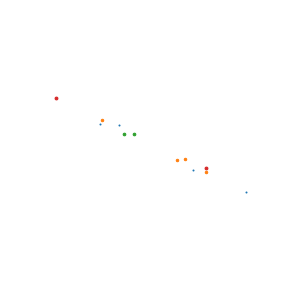

0.0


In [52]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.image as img
from matplotlib.cm import get_cmap

n_colors = 10
cmap = get_cmap('tab10')
unique = np.unique(raw_data['z'])
idxs = np.arange(n_colors)
lookup_table = np.zeros(len(raw_data['z']))
lookup_table[unique] += (idxs[:len(unique)] / float(n_colors)) + 0.5 / float(n_colors)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_axis_off()

for position, z in zip(positions, raw_data['z']):
    c = cmap(lookup_table[int(z)])
    print(c)
    ax.scatter(*(position), marker='o', color=cmap(lookup_table[int(z)]), s=int(z))

fig.tight_layout(pad=0)
ax.margins(0)
plt.savefig('tmp.png')
plt.show()
arr1 = img.imread('tmp.png') * 255

canvas = FigureCanvasAgg(fig)
canvas.draw()
buf = canvas.buffer_rgba()
arr2 = np.asarray(buf)

print(np.mean(np.abs(arr2-arr1)))
    


# for z, position in zip(data['z'], positions):
#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.set_axis_off()
#     ax.scatter(*(positions[:, i] for i in range(3)), marker='o')
#     fig.tight_layout(pad=0)
#     ax.margins(0)
#     plt.savefig('tmp.png')
#     arr1 = img.imread('tmp.png') * 255

#     canvas = FigureCanvasAgg(fig)
#     canvas.draw()
#     buf = canvas.buffer_rgba()
#     arr2 = np.asarray(buf)

#     print(np.mean(np.abs(arr2-arr1)))

# canvas.draw()
# buf = canvas.buffer_rgba()
# # convert to a NumPy array
# X = np.asarray(buf)
# fig.canvas.draw()
# canvas = FigureCanvas(fig)
# canvas.draw()       # draw the canvas, cache the renderer
# image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')





In [25]:
print(arr2)

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


In [14]:
atoms = read(uracil_xyz)
view(atoms, viewer='x3d')  # x3d for jupyter notebook
write('uracil.png', atoms)


NameError: name 'uracil_xyz' is not defined

None


In [18]:
ngl.NGLDisplay(uracil, xsize=100, ysize=100)

ModuleNotFoundError: No module named 'nglview'

In [ ]:
from ase import Atoms
d = 2.9
L = 10.0
wire = Atoms('Au',
             positions=[[0, L / 2, L / 2]],
             cell=[d, L, L],
             pbc=[1, 0, 0])
data, raw_data = load_data('/home/amawi/projects/mol-td/data/uracil_dft.npz')
